<a href="https://colab.research.google.com/github/dayanebravo/AED/blob/main/AED_AP_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados - AED** - **Aula Prática 04**

> Importar bibliotecas e dados

In [ ]:
import pandas as pd  # biblioteca com ferramentas para análise de dados/dataframes
import numpy as np  # biblioteca com operações matemáticas

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/dayanebravo/AED/main/pes_2012.csv")  # ler dados no formato CSV
df1.head()  #  exibe as primeiras linhas da tabela

In [ ]:
df1["V4718"] = pd.to_numeric(df1["V4718"],errors="coerce")  # transformar dados da coluna em float e os erros substituir por NaN
df1["V4720"] = pd.to_numeric(df1["V4720"],errors="coerce")

In [ ]:
df = df1.dropna()  # criando um NOVO dataframe com as linhas inválidas removidas
df.head()  #  exibe as primeiras linhas da tabela

In [ ]:
import matplotlib.pyplot as plt  # biblioteca básico para gráficos 
import seaborn as sn  # biblioteca auxiliar para gráficos

In [ ]:
sn.set(style="ticks",palette='crest')  # definir estilo de gráfico e cor

# **Séries: Temporais e Geográficas**
> **Temporal**

In [ ]:
series = pd.read_csv("https://raw.githubusercontent.com/dayanebravo/AED/main/daily-total-female-births.csv", header=0, index_col=0, parse_dates=True, squeeze=True)  
# parse_dates = combina/analisa colunas - squeeze = apenas uma coluna retorna uma série

series.head()  #  exibe as primeiras linhas da tabela

In [ ]:
plt.figure(figsize=(15 ,5))   # tamanho do gráfico
plt.plot(series)  # plotar o gráfico
plt.ylabel('total')  # nome do eixo y
plt.xlabel('data de aniversário')  # nome do eixo x
plt.show()  # exibir gráfico

> **Geográfica**

In [ ]:
sizes = df.UF  # coluna analisada 
sn.displot(y=sizes)  # dados na vertical para evitar problemas de espaçamento
plt.ylabel('UF')  # nome do eixo y
plt.xlabel('quantidade')  # nome do eixo x
plt.show()  # exibir gráfico

# **Somatórios** 
> 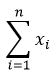

In [ ]:
def somatorio(x): # criar uma função que precisa de uma entrada x
    if x==1:
      return 1  # para x=1 retorna a saída e encerra a função
    else:  # caso x diferente de 1
      return x + somatorio(x-1)  # retorna a soma do termo e seu antecessor

x = int(input("Calcular o somatório de 1 até: "))  # construir a entrada x
print("Resultado do somatório: ", somatorio(x) )  # print que chama a função definida calculada em x

>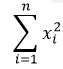

In [ ]:
def somatorio(x): # criar uma função que precisa de uma entrada x
    if x==1:
      return 1  # para x=1 retorna a saída e encerra a função
    else:  # caso x diferente de 1
      return x**2 + somatorio(x-1)  # retorna a soma do termo elevado ao quadrado e seu antecessor - soma dos quadrados

x = int(input("Calcular o somatório de 1 até: "))  # construir a entrada x
print("Resultado da soma dos quadrados: ",somatorio(x) ) # print que chama a função definida calculada em x

> 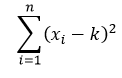

In [ ]:
def somatorio(x): # criar uma função que precisa de uma entrada x
  if x==1:
    return 1  # para x=1 retorna a saída e encerra a função
  else:  # caso x diferente de 1
    return (x-k)**2 + somatorio(x-1) 
# retorna o termo subtraído da média elevado ao quadrado e o resultado é somado ao seu antecessor 

x = int(input("Calcular o somatório de 1 até: "))  # construir a entrada x
k = int(input("O valor médio dos dados é: "))  # informar a média
print("Resultado da função: ",somatorio(x) )  # print que chama a função definida calculada em x

In [ ]:
x = df.V8005  # construir a entrada x
k = df.V8005.mean()  # calcular a média

def dm(x): # criar uma função que precisa de uma entrada x
  aux = np.array((x-k)**2)  # auxiliar que monta um vetor com a entrada subtraída da média e esse resultado é elevado ao quadrado
  return aux.sum()  # saída da função: soma dos termos do vetor aux

print("Resultado da função: ", dm(x) )  # print que chama a função definida calculada em x

# **Medidas de Tendência Central: Mediana, Moda e Média**

>**Mediana**

In [ ]:
np.median(df.V8005)  # usando numpy

In [ ]:
df.V8005.median()  # usando pandas

>**Moda**

In [ ]:
df.V8005.mode()  # moda quantitativas

In [ ]:
df.UF.mode()  #  moda qualitativas

>**Média aritmética**
>> 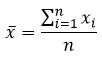

In [ ]:
np.mean(df.V8005)  # usando numpy

In [ ]:
df.V8005.mean()  # usando pandas

>**Média ponderada**
>> 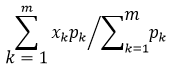

In [ ]:
pa = [15,15,30,30,10]  # Lista com os pesos de cada avaliação
spa = 100  # soma dos pesos
print("Índices das avaliações:",
      "\n 1 - APOL 1,",
      "\n 2 - APOL 2,",
      "\n 3 - Prova Objetiva,",
      "\n 4 - Atividade Prática,",
      "\n 5 - Prova Discursiva \n")
# orientação para o usuário

xi = []  # Lista com as notas de cada avaliação
md = []  # Lista com os produtos do peso e da avaliação associada ao índice i
n = 5  # Número de avaliações
i = 0  # Índice i que vai percorrer todas as notas

for i in range(n): # cada nota i dentro do número de avaliações
   print("\n Avaliação índice: ", i+1) # mensagem para usuário
   xi.append(int(input("Insira a nota da avaliação de acordo com o índice acima: ")))  # entrada da nota em xi  
   md.append(pa[i]*xi[i])  # inserir em md o resultado da multiplicação do peso pela nota

# Calcular a soma dos produtos em md
xp = 0 
for k in md:  # cada entrada k em md
    xp = xp+k  # soma das entradas de md
          
print("Esta é a média ponderada das suas notas: ", xp/spa) # mostra o total do produto da nota pelo peso - média final

>**Média geométrica**
>>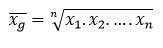

In [ ]:
def geo_mean(k):  # criar uma função que precisa de uma entrada k
  aux = np.array(k)  # auxiliar que monta um vetor com a entrada
  return aux.prod()**(1.0/len(aux))  # saída da função: produto dos termos do vetor aux elevado à (1/n)

x=[2,4,8,16,32]  # entrada como vetor
print(geo_mean(x))  # print que chama a função definida calculada em x

>**Média harmônica**
>> 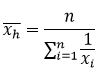

In [ ]:
x = [1,1/2,1/3,1/4,1/5]  # entrada como vetor
n = 5  # quantidade de termos do vetor

def soma_inv(k):  # criar uma função que precisa de uma entrada k
  aux = 1/np.array(k)  # auxiliar que monta um vetor com o valor inverso da entrada
  return aux.sum()  # saída da função: soma dos termos do vetor aux

print(n/soma_inv(x))  # print que divide n pela função calculada em x

In [ ]:
import statistics  # biblioteca com várias ferramentas estatísticas prontas
x=[1,1/2,1/3,1/4,1/5]  # entrada como vetor
print(statistics.harmonic_mean(x))   # função pronta da biblioteca statistics

# **Próximas Aulas...**
> **Medidas de tendência central para dados descritivos**

> **Mais alguns gráficos**